In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def region_growing(img, seed):
    height, width = img.shape
    segmented = np.zeros_like(img, dtype=np.uint8)
    threshold = 80
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    stack = [seed]
    seed_intensity = img[seed]

    while stack:
        current_seed = stack.pop()
        if 0 <= current_seed[0] < height and 0 <= current_seed[1] < width:
            intensity_diff = abs(int(img[current_seed]) - int(seed_intensity))
            if intensity_diff < threshold and segmented[current_seed] == 0:
                segmented[current_seed] = 255
                for neighbor in neighbors:
                    new_seed = (current_seed[0] + neighbor[0], current_seed[1] + neighbor[1])
                    stack.append(new_seed)
    return segmented

Text(0.5, 1.0, 'Region Segmented Image')

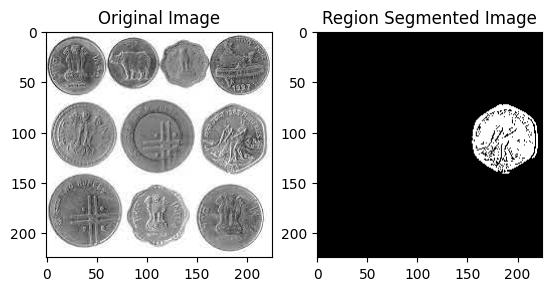

In [10]:
image = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)
seed_point = (100, 200)
segmented_image = region_growing(image, seed_point)

plt.subplot(1,2,1)
plt.imshow(image,'gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(segmented_image,'gray')
plt.title("Region Segmented Image")

Text(0.5, 1.0, 'Region Segmented Image')

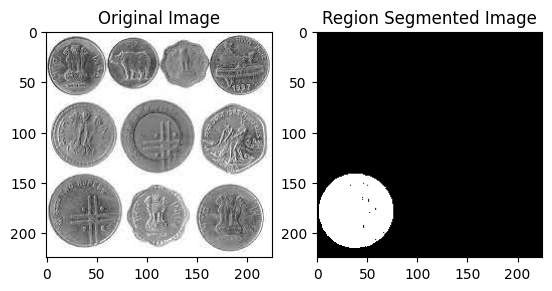

In [11]:
seed_point = (200, 50)
segmented_image = region_growing(image, seed_point)

plt.subplot(1,2,1)
plt.imshow(image,'gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(segmented_image,'gray')
plt.title("Region Segmented Image")

Text(0.5, 1.0, 'Region Segmented Image')

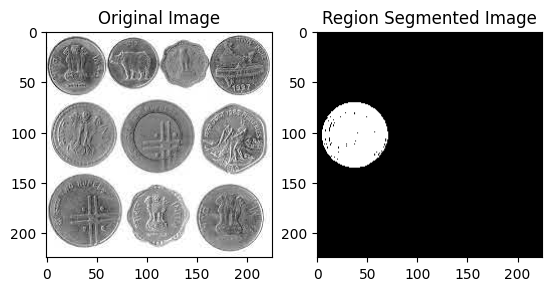

In [12]:
image = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)
seed_point = (100, 50)
segmented_image = region_growing(image, seed_point)

plt.subplot(1,2,1)
plt.imshow(image,'gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(segmented_image,'gray')
plt.title("Region Segmented Image")

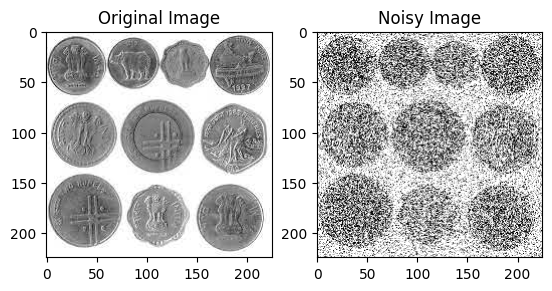

In [13]:
def add_noise(image, mean=0, sigma=100):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)

noisy_image = add_noise(image)

plt.subplot(1, 2, 1)
plt.imshow(image, 'gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, 'gray')
plt.title('Noisy Image')
plt.show()


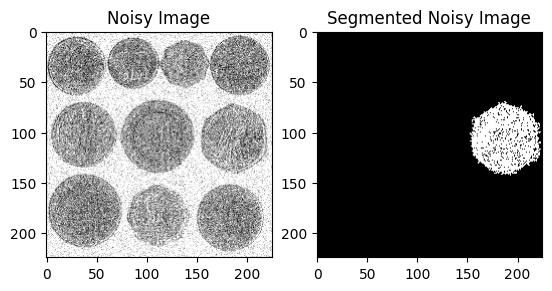

In [17]:
def add_noise(image, mean =0, sigma = 40):
  row, col = image.shape
  gauss = np.random.normal(mean,sigma, (row,col))
  noisy = np.clip(image + gauss, 0, 255)
  return noisy.astype(np.uint8)

noisy_image = add_noise(image)
seed_point = (100,200)
segmented_image = region_growing(noisy_image, seed_point)

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, 'gray')
plt.title("Segmented Noisy Image")

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, 'gray')
plt.title("Noisy Image")

plt.show()